<a href="https://colab.research.google.com/github/vaniahalim/DSTA-internship/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Ingestion

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1wfkICagzL3QQ9lj36YFpCszbDbg1MtLj"})   
downloaded.GetContentFile('calendar.csv')        

downloaded1 = drive.CreateFile({'id':"15K3kJchDOI8cJFFe8Bd2-54fd4qPUYYC"}) 
downloaded1.GetContentFile('sales_train_evaluation.csv')      

downloaded2 = drive.CreateFile({'id':"14zJDUk22i8ap8qRnhhNNR6aiY3kekW59"})   
downloaded2.GetContentFile('sales_test_evaluation.csv')       

downloaded3 = drive.CreateFile({'id':"1dfJZlP4SHbkgM0isxh1qtyFY35UFXdOv"})  
downloaded3.GetContentFile('sell_prices.csv')       

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
 
calendar = pd.read_csv('calendar.csv', header=0, parse_dates=[0])
train = pd.read_csv('sales_train_evaluation.csv')
test = pd.read_csv('sales_test_evaluation.csv')
prices = pd.read_csv('sell_prices.csv')

### Understanding the data


In [ ]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,0,0,2,1,0,2,0,1,0,0,1,0,0,0,1,1,0,2,1,1,0,0,1,0,0,1,0,3,3,1,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,1,0,0,1,0,3,1,3,1,3,0,1,2,1,0,2,1,1,2,0,2,1,1,0,2,1,1,1,1,4,6,0,1,1,1,0


In [ ]:
#[Ben]
print(f"Observation:\nThere are {train.isna().sum().sum()} missing/NaN values in sales dataframe")
print(f"""There are {train['item_id'].nunique()} unique items across {train['dept_id'].nunique()} 
departments under {train['cat_id'].nunique()} categories in {train['state_id'].nunique()} states""")
days = [i for i in train.columns.values if 'd_' in i]
print(f"There are {len(days)} days columns/features, which is around {len(days)//365} years of data")

Observation:
There are 0 missing/NaN values in sales dataframe
There are 3049 unique items across 7 
departments under 3 categories in 3 states
There are 1941 days columns/features, which is around 5 years of data


In [ ]:
train_sub = train[train.item_id== "HOBBIES_1_001"]
train_sub

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
3049,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,2,0,4,0,0,2,2,0,1,0,1,2,0,0,2,0,0,0,0,0,0,1,1,0,2,2,0,2,0,2,2,0,2,0,1
6098,HOBBIES_1_001_CA_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,4,0,1,1,1,0,3,3,1,1,0,1,0,2,1,0,1,2,1,1,4,1,1,0,0,0,2,6,0,1,0,2,1,0,1,0
9147,HOBBIES_1_001_CA_4_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1,2,1,0,0,0,1,4,0,2,0,1,1,0,0,1,1,2,1,0,0,1,0,3,1,1,1,0,1,2,2
12196,HOBBIES_1_001_TX_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,2,1,0,2,1,0,1
15245,HOBBIES_1_001_TX_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,1,1,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1
18294,HOBBIES_1_001_TX_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_3,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,0,0,1,3,0,0,0,1,0,1,0,3,0,0,3,1,1,2,1
21343,HOBBIES_1_001_WI_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,2,0,0,0,0,1,2
24392,HOBBIES_1_001_WI_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_2,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27441,HOBBIES_1_001_WI_3_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test

,item_id,dept_id,cat_id,store_id,state_id,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2,0,1,0,0,1,4,3,0,0,1,1,0,2,0,0,0,3,2,1,2,0,0,1,0,1,3,1
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2,0,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,2,1,1,0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,3,2,1,0,2,1,0,1,1
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,6,3,3,2,1,1,4,1,5,3,0,5,0,7,3,3,4,2,1,6,3,1,4,3
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,2,0,1,1,2,4,0,2,2,2,2,0,0,2,1,0,2,1,0,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,1,1,0,2,0,0,0,0,1,0,1,2,0,0,1,1,1,4,0,0,1,1,1,1,1,0
30486,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,4,1,0,1,0,1,0,0,0,0
30487,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1,0,0,0,0,0,0,1,1,1,1,2,0,0,2,0,1,3,1,1,2,1,2,1,1,1,1,0
30488,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,1,1,1,2,1,1,5,1,0,3,1,1,3,5,0,0,2,0,1,3,0,2,1,5


In [ ]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


### Data preparation (approach 1: plotting each item)

In [ ]:
#[Ben] Another way of selecting what to select to predict -- find items with little zero sales

train['ZERO_COUNT'] = (train.loc[:,'d_1':'d_1913'] == 0).astype(int).sum(axis=1)
train[train['ZERO_COUNT'] < 100]

# Material Index 1628 has one of the least zero sales, to be used as sample for predictions 

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,ZERO_COUNT
1628,FOODS_1_018_CA_1_evaluation,FOODS_1_018,FOODS_1,FOODS,CA_1,CA,17,3,8,2,5,0,1,5,12,4,7,9,2,5,11,6,3,3,3,2,14,19,12,8,2,3,3,4,5,2,5,6,5,0,...,11,4,7,6,6,5,1,9,25,22,13,9,9,3,6,1,9,2,5,2,7,12,24,23,7,3,3,10,4,7,8,15,5,11,6,17,11,13,11,53
1695,FOODS_1_085_CA_1_evaluation,FOODS_1_085,FOODS_1,FOODS,CA_1,CA,10,15,13,5,11,5,7,21,6,6,5,6,14,13,35,25,19,4,8,10,6,25,24,7,10,6,14,27,24,8,3,4,3,6,...,10,12,14,6,5,6,9,20,14,5,9,10,4,14,14,6,18,7,0,11,2,7,9,0,4,7,1,1,4,9,10,2,5,6,15,6,4,6,2,36
2197,FOODS_2_371_CA_1_evaluation,FOODS_2_371,FOODS_2,FOODS,CA_1,CA,7,14,5,7,1,8,6,23,12,7,10,7,8,8,10,11,8,5,7,7,6,12,13,8,9,4,6,3,13,12,4,13,2,0,...,12,12,6,11,9,3,4,7,10,15,10,5,4,7,5,8,16,13,13,10,8,12,11,13,11,9,5,3,3,7,13,12,10,2,1,3,6,7,10,92
2304,FOODS_3_080_CA_1_evaluation,FOODS_3_080,FOODS_3,FOODS,CA_1,CA,33,16,16,14,20,23,24,38,32,12,18,20,10,31,39,33,24,14,19,23,23,39,22,29,18,13,12,21,36,23,22,13,23,25,...,10,16,23,23,15,12,30,13,10,25,25,17,18,24,10,9,27,18,23,15,35,9,23,25,18,16,17,16,18,14,19,26,15,15,26,17,15,22,21,6
2323,FOODS_3_099_CA_1_evaluation,FOODS_3_099,FOODS_3,FOODS,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,17,22,24,22,25,13,19,17,13,14,30,24,20,30,24,17,28,26,40,20,15,18,14,...,20,13,20,26,17,11,16,5,15,14,20,11,14,22,7,14,20,23,10,0,18,13,9,12,12,22,21,14,11,9,17,15,16,16,5,13,14,25,27,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30251,FOODS_3_586_WI_3_evaluation,FOODS_3_586,FOODS_3,FOODS,WI_3,WI,61,67,35,66,37,62,63,80,66,61,65,54,51,53,81,89,45,51,55,36,62,75,57,43,41,37,47,55,74,65,45,63,53,51,...,29,37,48,40,35,22,25,31,35,47,44,25,17,23,23,23,43,42,27,43,27,31,61,54,40,28,31,32,30,43,38,51,22,20,25,23,24,36,37,6
30333,FOODS_3_668_WI_3_evaluation,FOODS_3_668,FOODS_3,FOODS,WI_3,WI,12,10,14,13,11,9,22,22,20,10,9,14,16,17,19,15,19,22,8,13,21,13,9,7,11,11,16,7,23,17,9,16,11,18,...,15,10,11,10,12,12,7,5,11,15,12,10,14,8,10,9,9,8,7,17,6,8,8,12,10,5,4,8,13,12,7,13,7,7,13,12,9,12,16,7
30359,FOODS_3_694_WI_3_evaluation,FOODS_3_694,FOODS_3,FOODS,WI_3,WI,47,40,48,54,31,58,48,59,48,44,45,57,41,65,62,52,51,55,50,49,59,61,39,44,44,39,41,37,40,52,33,53,33,55,...,51,65,58,59,54,42,34,34,46,46,48,42,36,31,19,40,44,43,36,49,39,43,50,59,48,41,31,32,40,72,64,57,57,37,30,45,51,46,48,7
30378,FOODS_3_714_WI_3_evaluation,FOODS_3_714,FOODS_3,FOODS,WI_3,WI,47,38,28,27,23,32,33,52,33,33,20,28,27,33,58,52,45,37,24,14,15,32,14,14,33,27,29,36,37,31,43,15,34,32,...,30,31,40,10,20,18,16,25,26,36,20,22,24,27,22,26,31,19,21,13,18,25,42,37,27,24,14,14,33,23,23,24,19,21,21,23,22,22,26,6


In [ ]:
chosen_item = "FOODS_1_018"
chosen_store = "CA_1"

In [ ]:
# combine dates and train data for 1 item
combined = calendar[['date','wm_yr_wk','event_name_1','event_type_1','event_name_2','event_type_2']]
# train_1 = pd.DataFrame({'item_id':['HOBBIES_1_001'], 'store_id':['CA_1']}, columns=['item_id','store_id'])
combined['item_id'] = chosen_item
combined['store_id'] = chosen_store
combined = combined[['date','item_id','store_id','wm_yr_wk','event_name_1','event_type_1','event_name_2','event_type_2']]
combined

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,item_id,store_id,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2
0,2011-01-29,FOODS_1_018,CA_1,11101,NaN,NaN,NaN,NaN
1,2011-01-30,FOODS_1_018,CA_1,11101,NaN,NaN,NaN,NaN
2,2011-01-31,FOODS_1_018,CA_1,11101,NaN,NaN,NaN,NaN
3,2011-02-01,FOODS_1_018,CA_1,11101,NaN,NaN,NaN,NaN
4,2011-02-02,FOODS_1_018,CA_1,11101,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1964,2016-06-15,FOODS_1_018,CA_1,11620,NaN,NaN,NaN,NaN
1965,2016-06-16,FOODS_1_018,CA_1,11620,NaN,NaN,NaN,NaN
1966,2016-06-17,FOODS_1_018,CA_1,11620,NaN,NaN,NaN,NaN
1967,2016-06-18,FOODS_1_018,CA_1,11621,NaN,NaN,NaN,NaN


In [ ]:
# merge (if have common columns) with prices, replace NaN values
combined_2=pd.merge(combined, prices, on=['wm_yr_wk','item_id','store_id'],how='left')
combined_2=combined_2[['date','item_id','store_id','wm_yr_wk','sell_price','event_name_1','event_type_1','event_name_2','event_type_2']]
combined_2['sell_price']=combined_2['sell_price'].fillna(0)
combined_2

,date,item_id,store_id,wm_yr_wk,sell_price,event_name_1,event_type_1,event_name_2,event_type_2
0,2011-01-29,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN
1,2011-01-30,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN
2,2011-01-31,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN
3,2011-02-01,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN
4,2011-02-02,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,FOODS_1_018,CA_1,11620,0.98,NaN,NaN,NaN,NaN
1965,2016-06-16,FOODS_1_018,CA_1,11620,0.98,NaN,NaN,NaN,NaN
1966,2016-06-17,FOODS_1_018,CA_1,11620,0.98,NaN,NaN,NaN,NaN
1967,2016-06-18,FOODS_1_018,CA_1,11621,0.98,NaN,NaN,NaN,NaN


In [ ]:
# extract units sold for chosen item
sold_tr = train.loc[(train.item_id==chosen_item) & (train.store_id==chosen_store) ,'d_1':'d_1941']
sold_tr = sold_tr.transpose()
sold_tr['index'] = pd.RangeIndex(0,1941)
sold_tr = sold_tr.set_index('index',drop=True, append=False, inplace=False, verify_integrity=False)
sold_tr.columns = ['unit_sold']
sold_tr

,unit_sold
index,
0,17
1,3
2,8
3,2
4,5
...,...
1936,6
1937,17
1938,11


In [ ]:
# join (based on index) / concatenate data
final = pd.concat([combined_2,sold_tr], axis=1)
final

,date,item_id,store_id,wm_yr_wk,sell_price,event_name_1,event_type_1,event_name_2,event_type_2,unit_sold
0,2011-01-29,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN,17.0
1,2011-01-30,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN,3.0
2,2011-01-31,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN,8.0
3,2011-02-01,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN,2.0
4,2011-02-02,FOODS_1_018,CA_1,11101,1.00,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,FOODS_1_018,CA_1,11620,0.98,NaN,NaN,NaN,NaN,NaN
1965,2016-06-16,FOODS_1_018,CA_1,11620,0.98,NaN,NaN,NaN,NaN,NaN
1966,2016-06-17,FOODS_1_018,CA_1,11620,0.98,NaN,NaN,NaN,NaN,NaN
1967,2016-06-18,FOODS_1_018,CA_1,11621,0.98,NaN,NaN,NaN,NaN,NaN


### data preparation (test data)


In [ ]:
# extract units sold for chosen item
sold_te = test.loc[(test.item_id==chosen_item) & (test.store_id==chosen_store) ,'d_1942':'d_1969']
sold_te = sold_te.transpose()
sold_te['index'] = pd.RangeIndex(0,28)
sold_te = sold_te.set_index('index',drop=True, append=False, inplace=False, verify_integrity=False)
sold_te.columns = ['unit_sold']
sold_te

,unit_sold
index,
0,13
1,2
2,3
3,5
4,11
5,9
6,18
7,7
8,14


### data visualization

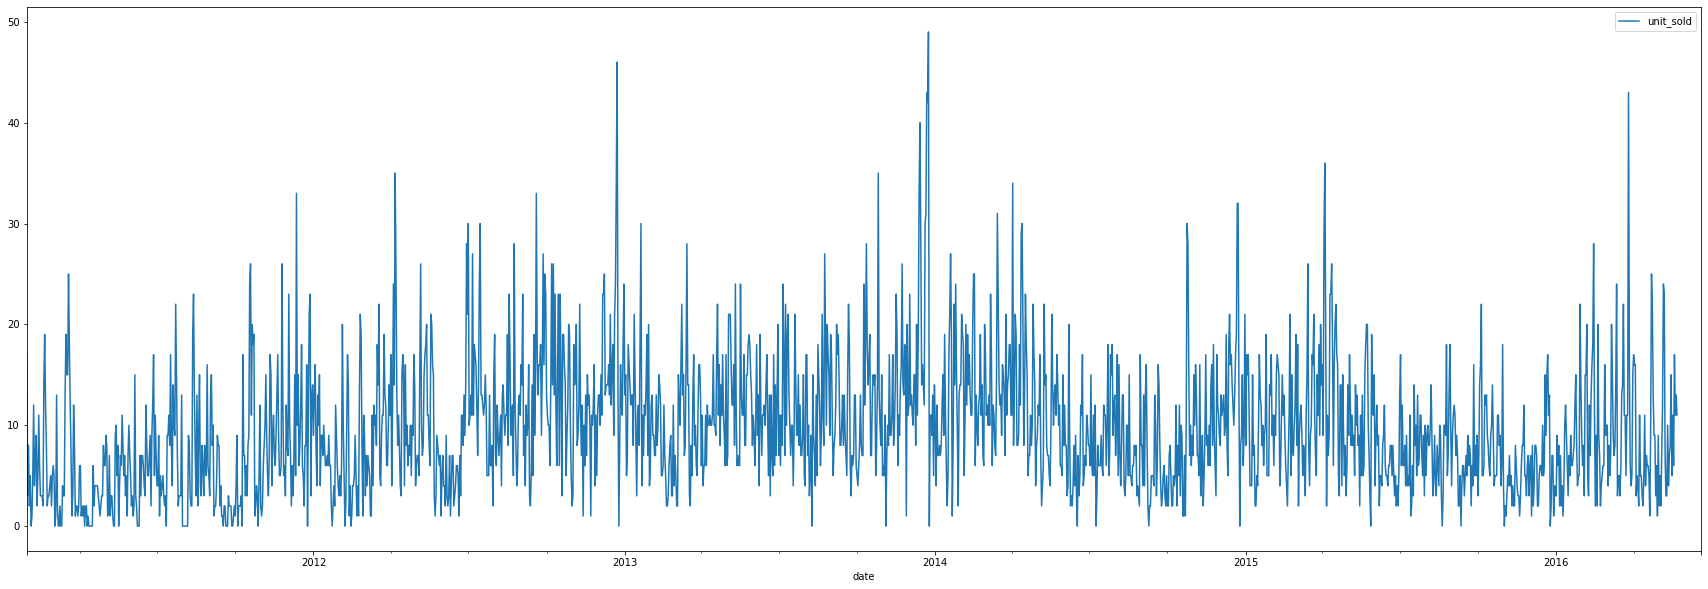

In [ ]:
final.plot('date','unit_sold',figsize=(30,10))

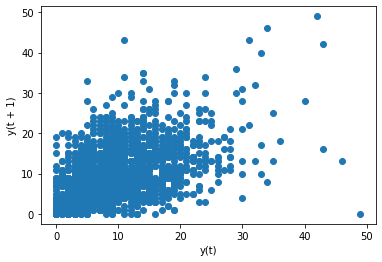

In [ ]:
from pandas.plotting import lag_plot
df = final[:1941]
df = df[['date','unit_sold']]
df['unit_sold'] = df['unit_sold'].astype(int)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.asfreq('D')
lag_plot(df, lag=1)
pyplot.show()

# slight correlation

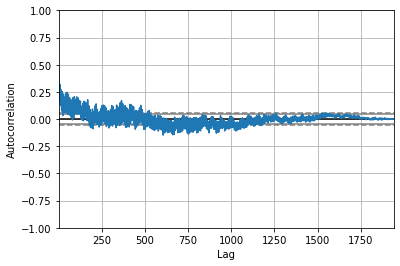

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

# low autocorrelation, low white noise

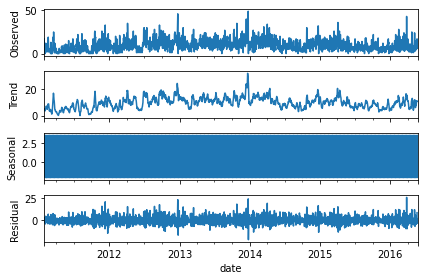

In [ ]:
# decomposition: how to interpret?
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive')
result.plot()
pyplot.show()

In [ ]:
X = df.values

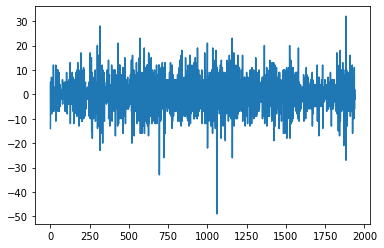

In [ ]:
# detrend using differencing
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i-1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

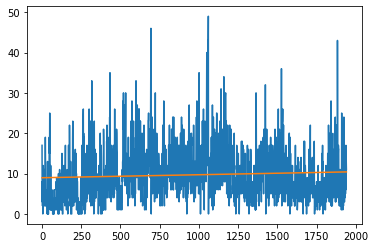

In [ ]:
# fit linear model
from sklearn.linear_model import LinearRegression
X = [i for i in range(0, len(df))]
X = np.reshape(X, (len(X), 1))
y = df.values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()

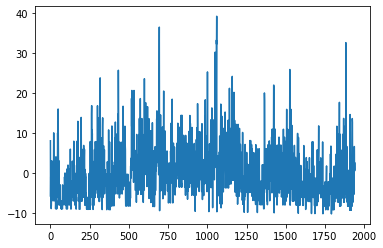

In [ ]:
detrended = [y[i]-trend[i] for i in range(0, len(df))]
pyplot.plot(detrended)
pyplot.show()

In [ ]:
# stationarity test: indicates non-stationary because no sales at first
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=484.500000, mean2=1455.000000
variance1=78408.250000, variance2=78570.000000


In [ ]:
# modified stationary test for second half: similar distribution
split = int(len(X) / 2)
split_2 = int((split+len(X))/2)
X1, X2 = X[split:split_2], X[split_2:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1212.000000, mean2=1697.500000
variance1=19602.000000, variance2=19682.916667


In [ ]:
# stationary test using stats
from statsmodels.tsa.stattools import adfuller
X_1 = df.iloc[:,0].values
result = adfuller(X_1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result

ADF Statistic: -4.969139
p-value: 0.000026
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


(-4.969139044748538,
 2.553538519709321e-05,
 26,
 1914,
 {'1%': -3.4337711555892523,
  '10%': -2.567574528530358,
  '5%': -2.8630512450631986},
 11941.313509147327)

### evaluate models (unsuccessful)


In [ ]:
# create lagged dataset
X_df = pd.DataFrame(df.values)
df_lag = pd.concat([X_df.shift(1), X_df], axis=1)
df_lag.columns = ['t', 't+1']
df_lag

,t,t+1
0,NaN,17
1,17.0,3
2,3.0,8
3,8.0,2
4,2.0,5
...,...,...
1936,11.0,6
1937,6.0,17
1938,17.0,11
1939,11.0,13


In [ ]:
# train-test data
tr = df
te = sold_te
# train_X, train_y = final['date'][:1941], sold_tr['unit_sold']
# test_X, test_y = final['date'][1941:], sold_te['unit_sold']
train_X, train_y = tr.index, tr['unit_sold']
test_X, test_y = te.index, te['unit_sold']
train_X

NameError: ignored

In [ ]:
# persistence model
def model_persistence(x):
    return x

from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

In [ ]:
# rmse = np.sqrt(mean_squared_error(test_y, predictions))
# print(f'Test RMSE: {rmse}')

# pyplot.plot(train_y)
# pyplot.plot([None for i in train_y] + [x for x in test_y])
# pyplot.plot([None for i in train_y] + [x for x in predictions])

In [ ]:
predictions = [x for x in test_X]
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals

,0
0,13
1,1
2,1
3,2
4,7
5,4
6,12
7,0
8,6
9,2


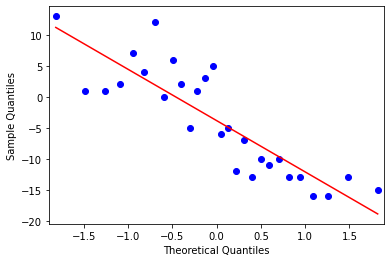

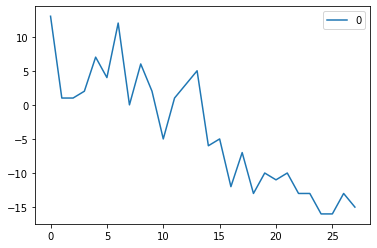

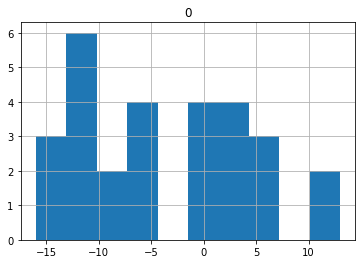

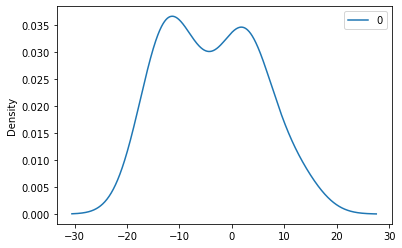

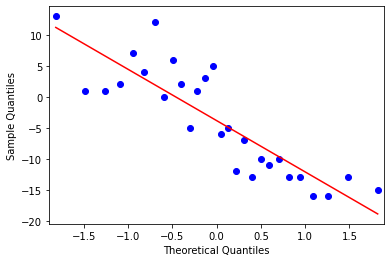

In [ ]:
residuals.plot()
residuals.describe()
residuals.hist()
residuals.plot(kind='kde')
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='r')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

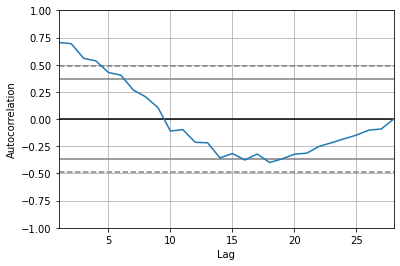

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)

### Preparing datasets

In [ ]:
# train set
ts_train = final[['date','unit_sold']]
ts_train = ts_train.set_index('date',drop=True, append=False, inplace=False, verify_integrity=False)
ts_train = ts_train[:1941]
ts_train

,unit_sold
date,
2011-01-29,17.0
2011-01-30,3.0
2011-01-31,8.0
2011-02-01,2.0
2011-02-02,5.0
...,...
2016-05-18,6.0
2016-05-19,17.0
2016-05-20,11.0


In [ ]:
# test set
test_date = final['date'][1941:]
test_date = pd.DataFrame(test_date)
test_date['index'] = pd.RangeIndex(0,28)
test_date = test_date.set_index('index',drop=True, append=False, inplace=False, verify_integrity=False)
test_date['unit_sold'] = sold_te['unit_sold']
ts_test = test_date.set_index('date',drop=True, append=False, inplace=False, verify_integrity=False)
ts_test

,unit_sold
date,
2016-05-23,13
2016-05-24,2
2016-05-25,3
2016-05-26,5
2016-05-27,11
2016-05-28,9
2016-05-29,18
2016-05-30,7
2016-05-31,14


In [ ]:
# I combined the both for the models below and use the train_test function to split out the train and test splits instead
combined=ts_train.append(ts_test)
combined

,unit_sold
date,
2011-01-29,17.0
2011-01-30,3.0
2011-01-31,8.0
2011-02-01,2.0
2011-02-02,5.0
...,...
2016-06-15,10.0
2016-06-16,8.0
2016-06-17,9.0


### Univariate forecasting


##### Common Functions


In [ ]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [ ]:
# split a univariate sequence into samples of train/test moving windows 
def moving_window(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()    
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
    if out_end_ix > len(sequence):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
 #Do a train test split manually
def train_test_split(dataset, test_size = 0.2):
    ratio = int((1 - test_size) * len(dataset))
    return dataset[:ratio, :], dataset[ratio:,:]

In [ ]:
# Evaluate model and compare with benchmark model
def model_score(predictions, actual, rmse_benchmark):
  model_rmse = sqrt(mean_squared_error(actual, predictions)) #use sklearn function
  print('RMSE: {}'.format(model_rmse))
  print('RMSE(benchmark): {}'.format(rmse_benchmark))
  print('Relative RMSE (): {}'.format(model_rmse / rmse_benchmark))
  print('{}% improvement in RMSE as compared to Moving Average Model (Benchmark)'.format(round((1 - (model_rmse / rmse_benchmark))*100,1)))
  print()
  print('MAE: {}'.format(mean_absolute_error(actual, predictions))) #use sklearn function
  print('Mean: {}'.format(actual.mean()))
  print('MAE to Mean Ratio: {}'.format(mean_absolute_error(actual, predictions) / actual.mean() ))

In [ ]:
#Don't need to define your own functions use the sklearn functions to compute rmse and mae to mean ratio as above
# criteria

def rmse(targets, predictions):
    return np.sqrt(((targets - predictions) ** 2).mean())
# mean_absolute_error
# mean
def mae_to_mean(targets, predictions): 
    mean_absolute_error(targets, predictions) / targets.mean()

##### Baseline model

In [ ]:
y_truth=combined['unit_sold'] # I combined the train and test dataset first

scaler = MinMaxScaler(feature_range= (0,1))
y_truth_scaled = scaler.fit_transform(y_truth.values.reshape(-1,1))
train, test = train_test_split(y_truth_scaled, test_size = 0.2)

# We want to predict the demand for the next 28 days window
X_train, y_train = moving_window(train, n_steps_in= 28, n_steps_out= 28) # 28 steps as X, next 28 steps as Y, then shift by 1 step to create next set of data points
X_test, y_test = moving_window(test, n_steps_in= 28, n_steps_out=28)

KeyError: ignored

In [ ]:
mavg_pred = [i.mean() for i in X_test.reshape(X_test.shape[0],X_test.shape[1])]
mavg_pred = scaler.inverse_transform(pd.Series(mavg_pred).values.reshape(-1,1))
mavg_pred = pd.Series([i[0] for i in mavg_pred])

In [ ]:
y_truth_test = scaler.inverse_transform(y_test.reshape(y_test.shape[0], y_test.shape[1]))
y_truth_test = pd.Series([i[0] for i in y_truth_test])
y_truth_test

0       8.0
1       8.0
2       5.0
3       8.0
4       5.0
       ... 
334    17.0
335    11.0
336    13.0
337    11.0
338    13.0
Length: 339, dtype: float64

In [ ]:
rmse_benchmark = sqrt(mean_squared_error(y_truth_test, mavg_pred))
print('RMSE(benchmark): {}'.format(rmse_benchmark))
print('')
print('MAE: {}'.format(mean_absolute_error(y_truth_test, mavg_pred)))
print('Mean: {}'.format(y_truth_test.mean()))
print('MAE to Mean Ratio: {}'.format(mean_absolute_error(y_truth_test, mavg_pred) / y_truth_test.mean() ))

RMSE(benchmark): 5.2613867960833405

MAE: 3.8925410872313524
Mean: 7.828908554572271
MAE to Mean Ratio: 0.49720099041877486


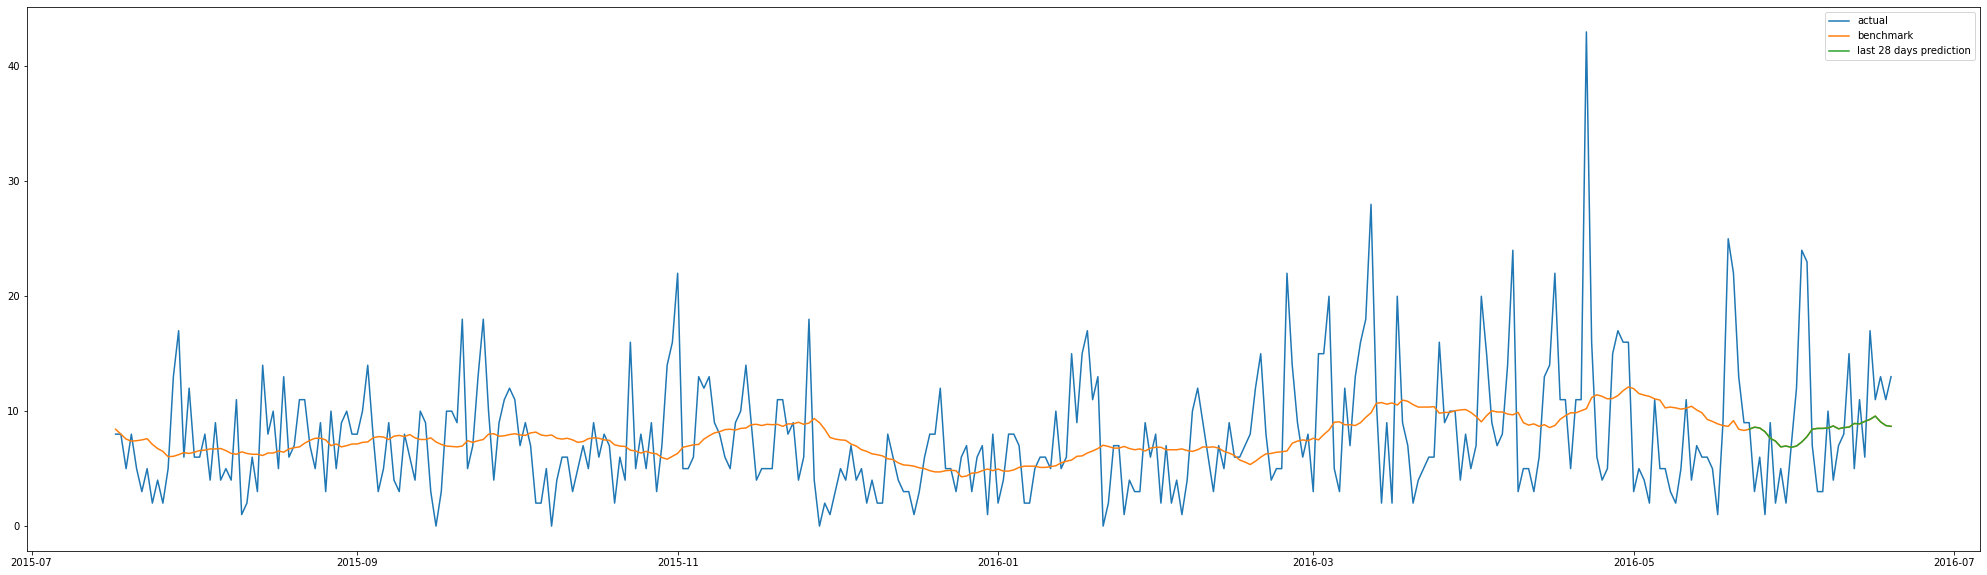

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(final['date'].tail(len(y_truth_test)),y_truth_test,label='actual')
#pyplot.plot(y_truth_test)
plt.plot(final['date'].tail(len(y_truth_test)),mavg_pred,label='benchmark')
plt.plot(final['date'].tail(28),mavg_pred[-28:],label="last 28 days prediction")
plt.legend()
plt.show()

##### Croston

In [ ]:
def Croston(ts,extra_periods=1,alpha=0.4):
    d = np.array(ts) # Transform the input into a numpy array
    cols = len(d) # Historical period length
    d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
    
    a,p,f = np.full((3,cols+extra_periods),np.nan) # Return new array 
    q = 1 
    
    # Initialization
    first_occurence = np.argmax(d[:cols]>0)
    a[0] = d[first_occurence]
    p[0] = 1 + first_occurence
    f[0] = a[0]/p[0]
    
    # Create all the t+1 forecasts
    for t in range(0,cols):        
        if d[t] > 0:
            a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
            p[t+1] = alpha*q + (1-alpha)*p[t]
            f[t+1] = a[t+1]/p[t+1]
            q = 1           
        else:
            a[t+1] = a[t]
            p[t+1] = p[t]
            f[t+1] = f[t]
            q += 1

    # Future Forecast 
    a[cols+1:cols+extra_periods] = a[cols]
    p[cols+1:cols+extra_periods] = p[cols]
    f[cols+1:cols+extra_periods] = f[cols]
    
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
    return df

In [ ]:
def Croston_TSB(ts,extra_periods=1,alpha=0.4,beta=0.4):
    d = np.array(ts) # Transform the input into a numpy array
    cols = len(d) # Historical period length
    d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
    
    #level (a), probability(p) and forecast (f)
    a,p,f = np.full((3,cols+extra_periods),np.nan)
    
    # Initialization
    first_occurence = np.argmax(d[:cols]>0)
    a[0] = d[first_occurence]
    p[0] = 1/(1 + first_occurence)
    f[0] = p[0]*a[0]
                 
    # Create all the t+1 forecasts
    for t in range(0,cols): 
        if d[t] > 0:
            a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
            p[t+1] = beta*(1) + (1-beta)*p[t]
            f[t+1] = p[t+1]*a[t+1]
        else:
            a[t+1] = a[t]
            p[t+1] = (1-beta)*p[t]       
            f[t+1] = p[t+1]*a[t+1]
        
    # Future Forecast
    a[cols+1:cols+extra_periods] = a[cols]
    p[cols+1:cols+extra_periods] = p[cols]
    f[cols+1:cols+extra_periods] = f[cols]
                      
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
    return df

In [ ]:
# Use the croston model to train
croston_train = Croston(ts_train)
croston_train

,Demand,Forecast,Period,Level,Error
0,17.0,17.000000,1.0,17.000000,0.000000
1,3.0,17.000000,1.0,17.000000,-14.000000
2,8.0,11.400000,1.0,11.400000,-3.400000
3,2.0,10.040000,1.0,10.040000,-8.040000
4,5.0,6.824000,1.0,6.824000,-1.824000
...,...,...,...,...,...
1937,17.0,7.988717,1.0,7.988717,9.011283
1938,11.0,11.593230,1.0,11.593230,-0.593230
1939,13.0,11.355938,1.0,11.355938,1.644062
1940,11.0,12.013563,1.0,12.013563,-1.013563


In [ ]:
# Test it on the last 28 days
croston_test = Croston(ts_test)
croston_test

,Demand,Forecast,Period,Level,Error
0,13.0,13.000000,1.0,13.000000,0.000000
1,2.0,13.000000,1.0,13.000000,-11.000000
2,3.0,8.600000,1.0,8.600000,-5.600000
3,5.0,6.360000,1.0,6.360000,-1.360000
4,11.0,5.816000,1.0,5.816000,5.184000
5,9.0,7.889600,1.0,7.889600,1.110400
6,18.0,8.333760,1.0,8.333760,9.666240
7,7.0,12.200256,1.0,12.200256,-5.200256
8,14.0,10.120154,1.0,10.120154,3.879846
9,11.0,11.672092,1.0,11.672092,-0.672092


In [ ]:
# Lets append the two dataframes together and plot it 
croston_combined= croston_train.append(croston_test)
croston_combined

,Demand,Forecast,Period,Level,Error
0,17.0,17.000000,1.0,17.000000,0.000000
1,3.0,17.000000,1.0,17.000000,-14.000000
2,8.0,11.400000,1.0,11.400000,-3.400000
3,2.0,10.040000,1.0,10.040000,-8.040000
4,5.0,6.824000,1.0,6.824000,-1.824000
...,...,...,...,...,...
24,8.0,9.561827,1.0,9.561827,-1.561827
25,9.0,8.937096,1.0,8.937096,0.062904
26,13.0,8.962258,1.0,8.962258,4.037742
27,12.0,10.577355,1.0,10.577355,1.422645


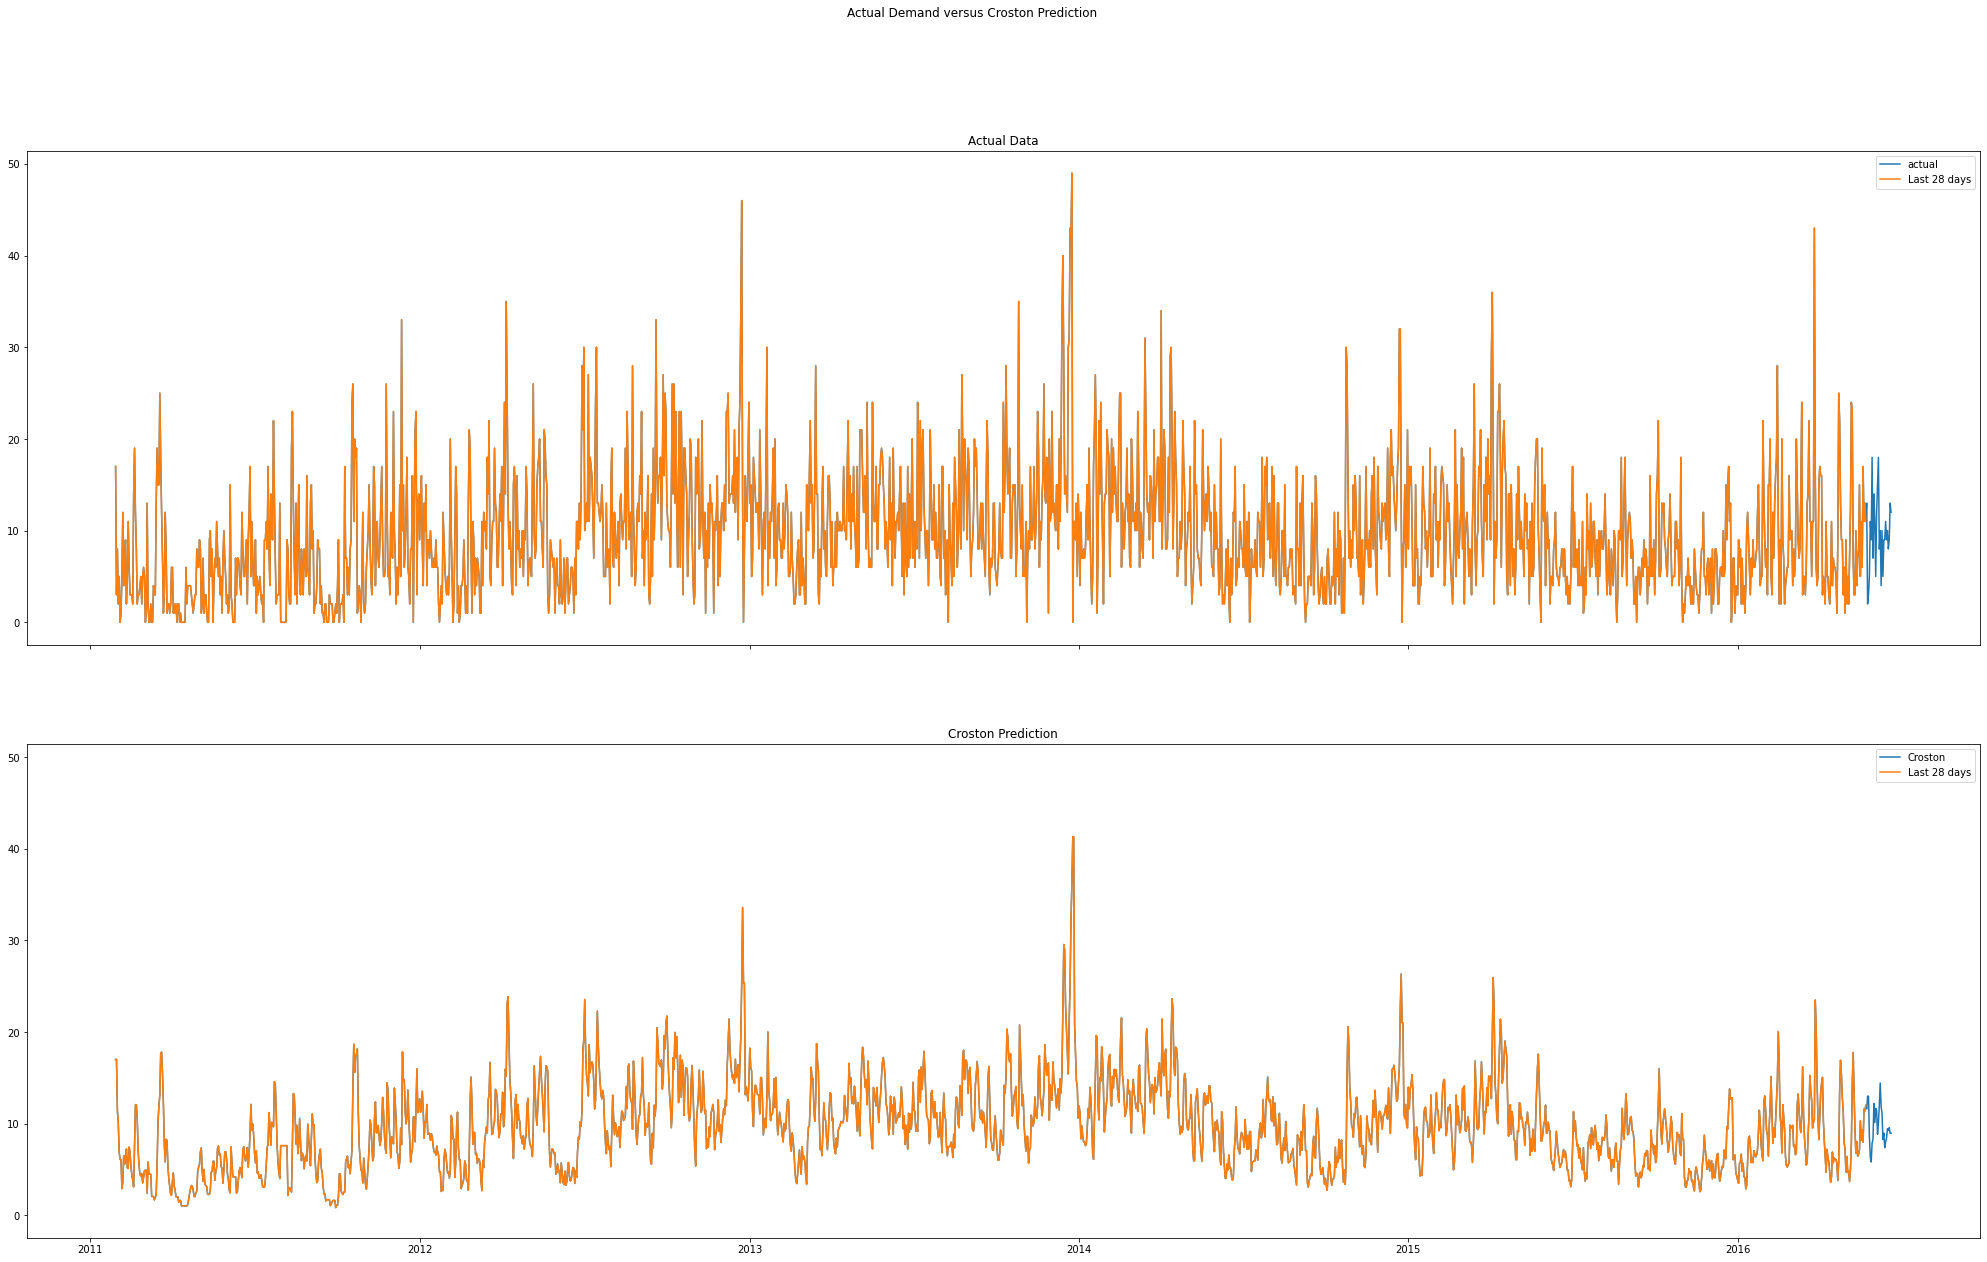

In [ ]:
fig, axs = plt.subplots(2,figsize=(35,20),sharex=True,sharey=True)
fig.suptitle('Actual Demand versus Croston Prediction')
axs[0].plot(combined.index,combined["unit_sold"],label='actual')
axs[0].set_title("Actual Data")
axs[0].plot(combined.index[:-28],combined["unit_sold"][:-28],label='Last 28 days')
axs[1].plot(combined.index,croston_combined['Forecast'][:-2],label='Croston')
axs[1].set_title("Croston Prediction")
axs[1].plot(combined.index[:-28],croston_combined['Forecast'][:-30],label='Last 28 days')
axs[0].legend()
axs[1].legend()

In [ ]:
rmse_croston = sqrt(mean_squared_error(croston_test["Demand"][:-1],croston_test['Forecast'][:-1]))
print('RMSE(Croston): {}'.format(rmse_croston))
model_score(croston_test['Forecast'][:-1], croston_test["Demand"][:-1], rmse_benchmark)

RMSE(Croston): 4.529715642767984
RMSE: 4.529715642767984
RMSE(benchmark): 5.2613867960833405
Relative RMSE (): 0.8609356845119192
13.9% improvement in RMSE as compared to Moving Average Model (Benchmark)

MAE: 3.5221802203330705
Mean: 9.642857142857142
MAE to Mean Ratio: 0.3652631339604666


##### Croston TSB

In [ ]:
crostonTSB_train = Croston_TSB(ts_train)
crostonTSB_train

,Demand,Forecast,Period,Level,Error
0,17.0,17.000000,1.0,17.000000,0.000000
1,3.0,17.000000,1.0,17.000000,-14.000000
2,8.0,11.400000,1.0,11.400000,-3.400000
3,2.0,10.040000,1.0,10.040000,-8.040000
4,5.0,6.824000,1.0,6.824000,-1.824000
...,...,...,...,...,...
1937,17.0,7.988717,1.0,7.988717,9.011283
1938,11.0,11.593230,1.0,11.593230,-0.593230
1939,13.0,11.355938,1.0,11.355938,1.644062
1940,11.0,12.013563,1.0,12.013563,-1.013563


In [ ]:
crostonTSB_test =Croston_TSB(ts_test)
crostonTSB_test

,Demand,Forecast,Period,Level,Error
0,13.0,13.000000,1.0,13.000000,0.000000
1,2.0,13.000000,1.0,13.000000,-11.000000
2,3.0,8.600000,1.0,8.600000,-5.600000
3,5.0,6.360000,1.0,6.360000,-1.360000
4,11.0,5.816000,1.0,5.816000,5.184000
5,9.0,7.889600,1.0,7.889600,1.110400
6,18.0,8.333760,1.0,8.333760,9.666240
7,7.0,12.200256,1.0,12.200256,-5.200256
8,14.0,10.120154,1.0,10.120154,3.879846
9,11.0,11.672092,1.0,11.672092,-0.672092


In [ ]:
# Lets append the two dataframes together and plot it 
crostonTSB_combined= crostonTSB_train.append(crostonTSB_test)


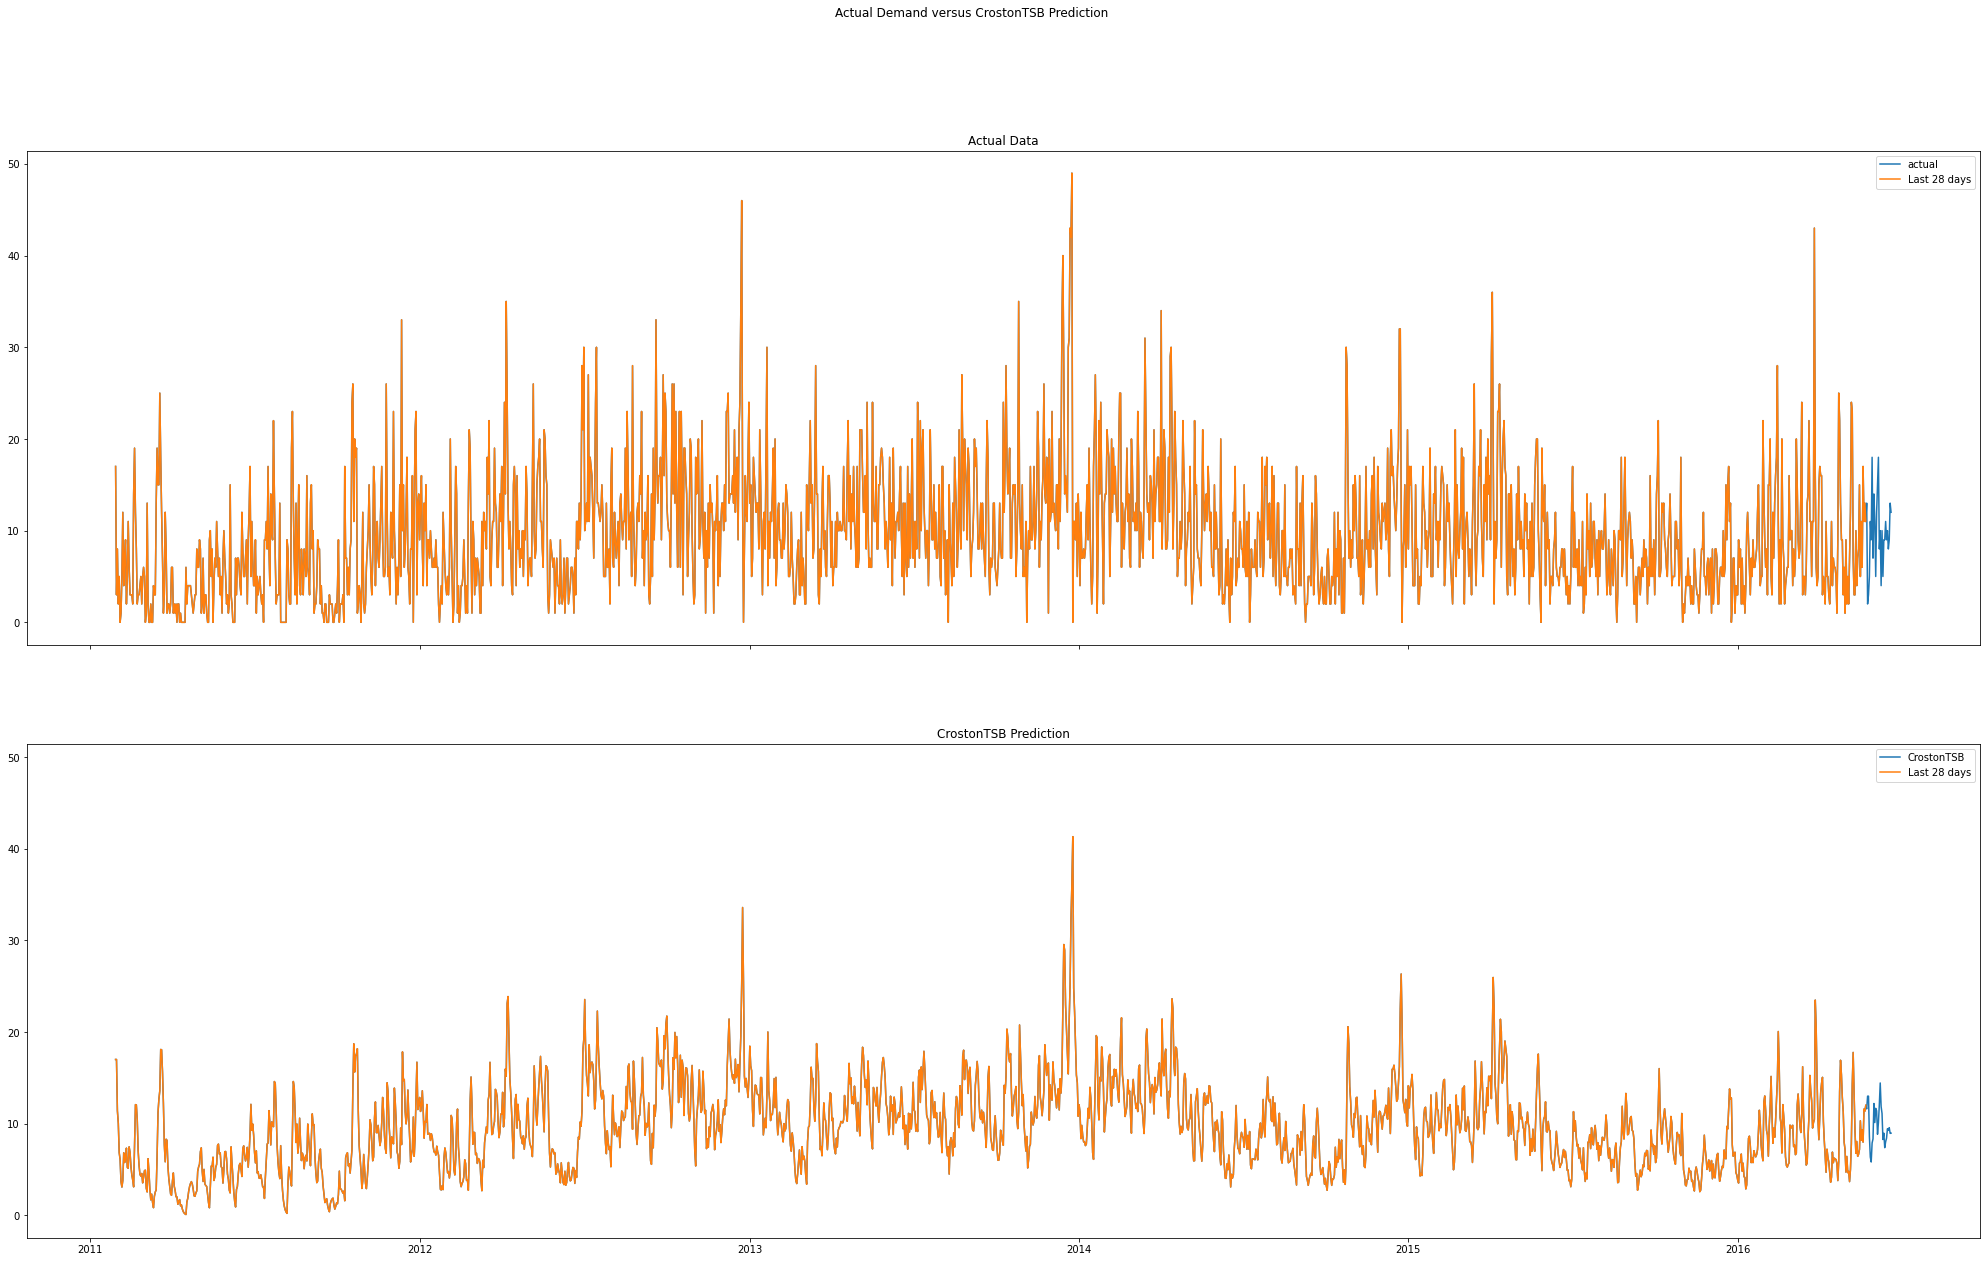

In [ ]:
fig, axs = plt.subplots(2,figsize=(35,20),sharex=True,sharey=True)
fig.suptitle('Actual Demand versus CrostonTSB Prediction')
axs[0].plot(combined.index,combined["unit_sold"],label='actual')
axs[0].set_title("Actual Data")
axs[0].plot(combined.index[:-28],combined["unit_sold"][:-28],label='Last 28 days')
axs[1].plot(combined.index,crostonTSB_combined['Forecast'][:-2],label='CrostonTSB')
axs[1].set_title("CrostonTSB Prediction")
axs[1].plot(combined.index[:-28],crostonTSB_combined['Forecast'][:-30],label='Last 28 days')
axs[0].legend()
axs[1].legend()

In [ ]:
rmse_crostonTSB = sqrt(mean_squared_error(crostonTSB_test["Demand"][:-1],crostonTSB_test['Forecast'][:-1]))
print('RMSE(CrostonTSB): {}'.format(rmse_crostonTSB))
model_score(crostonTSB_test['Forecast'][:-1], crostonTSB_test["Demand"][:-1], rmse_benchmark)

RMSE(CrostonTSB): 4.529715642767984
RMSE: 4.529715642767984
RMSE(benchmark): 5.2613867960833405
Relative RMSE (): 0.8609356845119192
13.9% improvement in RMSE as compared to Moving Average Model (Benchmark)

MAE: 3.5221802203330705
Mean: 9.642857142857142
MAE to Mean Ratio: 0.3652631339604666


##### MLP

In [ ]:
scaler = MinMaxScaler(feature_range= (0,1))
y_truth_scaled = scaler.fit_transform(y_truth.values.reshape(-1,1))
train, test = train_test_split(y_truth_scaled, test_size = 0.2)

X_train, y_train = moving_window(train, n_steps_in= 28, n_steps_out= 28)
X_test, y_test = moving_window(test, n_steps_in= 28, n_steps_out= 28)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1520, 28, 1)
(1520, 28, 1)
(339, 28, 1)
(339, 28, 1)


In [ ]:
n_input = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], n_input) # flatten the input to fit dense layer, thus losing the temporal information (timesteps)
y_train = y_train[:,:,0]

X_test = X_test.reshape(X_test.shape[0], n_input) # flatten the input to fit dense layer

model = Sequential()  # tried 200 -> 100 -> 50 dense layers
model.add(Dense(100, activation= 'relu', input_dim = n_input))
model.add(Dense(50, activation= 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(28))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics='mean_absolute_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               2900      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 28)                1428      
Total params: 9,378
Trainable params: 9,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name = 'mlp_uni'
history_file = 'history_' + model_name + '.csv'
model_file = 'model_' + model_name + '.h5'

csv_logger = CSVLogger(history_file)
model.fit(X_train, y_train, epochs = 100, batch_size = 32, shuffle= False, validation_data=(X_test, y_test), verbose= 1, callbacks= [csv_logger])
model.save(model_file)

Epoch 1/100
48/48 [==============================] - 1s 5ms/step - loss: 0.0319 - mean_absolute_error: 0.1352 - val_loss: 0.0125 - val_mean_absolute_error: 0.0819
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0212 - mean_absolute_error: 0.1102 - val_loss: 0.0118 - val_mean_absolute_error: 0.0804
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0198 - mean_absolute_error: 0.1066 - val_loss: 0.0116 - val_mean_absolute_error: 0.0800
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0192 - mean_absolute_error: 0.1053 - val_loss: 0.0114 - val_mean_absolute_error: 0.0803
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0188 - mean_absolute_error: 0.1045 - val_loss: 0.0114 - val_mean_absolute_error: 0.0806
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0185 - mean_absolute_error: 0.1037 - val_loss: 0.0114 - val_mean_absolute_error: 0.0809
Epoch 7/100
48/48 [===

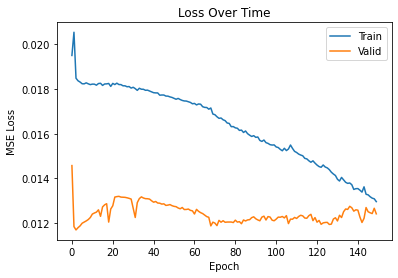

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [ ]:
mlp_pred = scaler.inverse_transform(model.predict(X_test))
mlp_pred = pd.Series([i[0] for i in mlp_pred])

In [ ]:
y_truth_test = scaler.inverse_transform(y_test.reshape(y_test.shape[0], y_test.shape[1]))
y_truth_test = pd.Series([i[0] for i in y_truth_test])

In [ ]:
rmse_mlp = sqrt(mean_squared_error(y_truth_test, mlp_pred))
model_score(mlp_pred, y_truth_test, rmse_benchmark)

RMSE: 5.236097868165817
RMSE(benchmark): 5.2613867960833405
Relative RMSE (): 0.9951934862617686
0.5% improvement in RMSE as compared to Moving Average Model (Benchmark)

MAE: 3.955217996529773
Mean: 7.828908554572271
MAE to Mean Ratio: 0.5052068202048203


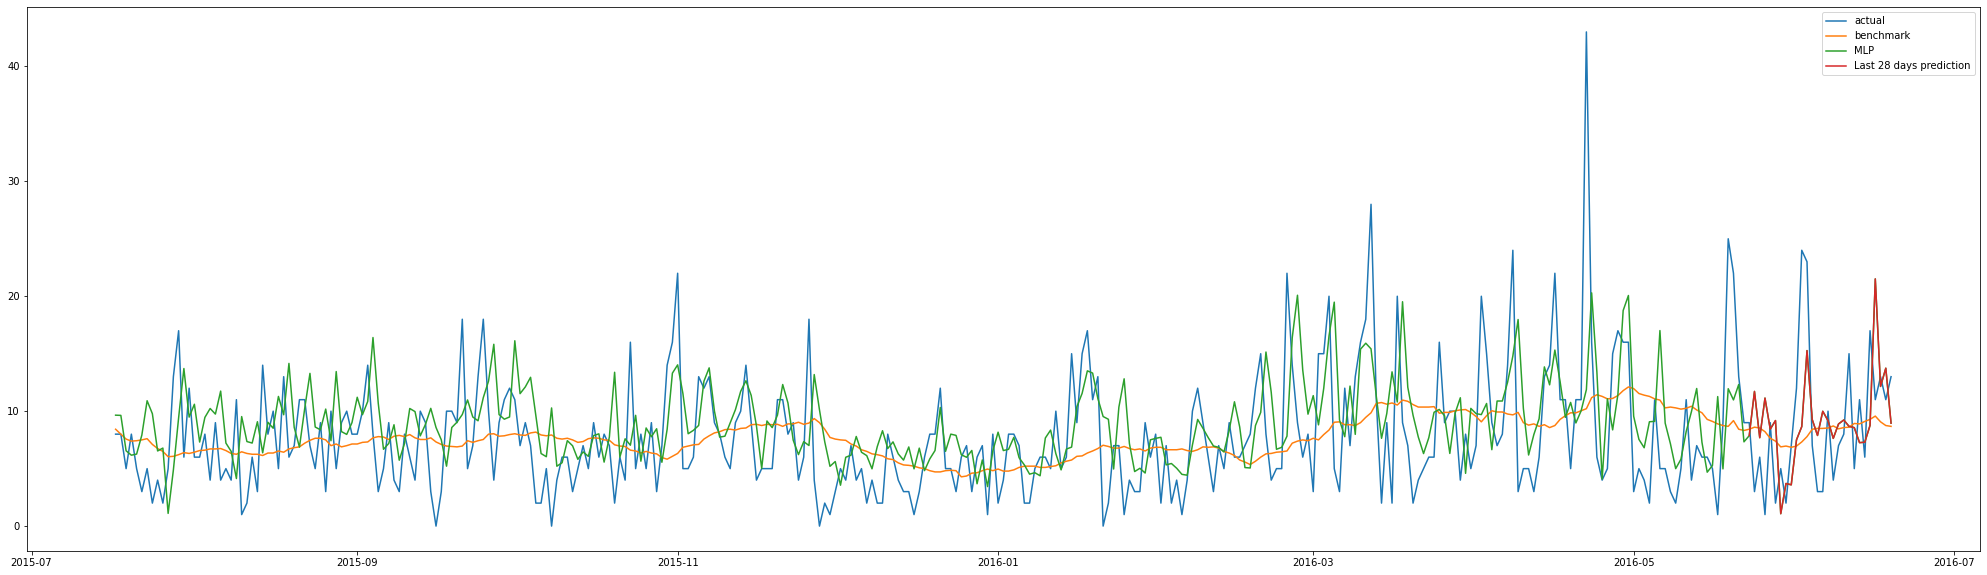

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(final['date'].tail(len(y_truth_test)),y_truth_test,label="actual")
plt.plot(final['date'].tail(len(y_truth_test)),mavg_pred,label="benchmark")
plt.plot(final['date'].tail(len(y_truth_test)),mlp_pred,label="MLP")
plt.plot(final['date'].tail(28),mlp_pred[-28:],label="Last 28 days prediction")
plt.legend()
plt.show()

In [ ]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = ts_train['unit_sold']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([2, 4, 10])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(rmse())


NameError: ignored

##### LTSM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential, Model 
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Input, RepeatVector, Bidirectional, InputLayer, Conv1D, MaxPooling1D, Flatten, Activation, Lambda, Multiply, Add, Concatenate
from tensorflow.keras.callbacks import CSVLogger

In [ ]:
# data prep
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
y_truth=combined['unit_sold'] # I combined the train and the final test data of 28 days 

scaler = MinMaxScaler(feature_range= (0,1))  # scale the data to between 0-1
y_truth_scaled = scaler.fit_transform(y_truth.values.reshape(-1,1)) #reshape into a vertical form and fit_transform using the scaler
train, test = train_test_split(y_truth_scaled, test_size = 0.2)

X_train, y_train = moving_window(train, n_steps_in= 28, n_steps_out= 28)
X_test, y_test = moving_window(test, n_steps_in= 28, n_steps_out=28)

In [ ]:
y_truth=combined['unit_sold']
y_truth

date
2011-01-29    17.0
2011-01-30     3.0
2011-01-31     8.0
2011-02-01     2.0
2011-02-02     5.0
              ... 
2016-06-15    10.0
2016-06-16     8.0
2016-06-17     9.0
2016-06-18    13.0
2016-06-19    12.0
Name: unit_sold, Length: 1969, dtype: float64

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1520, 28, 1)
(1520, 28, 1)
(339, 28, 1)
(339, 28, 1)


In [ ]:
X_train.shape[1]

28

In [ ]:
X_train.shape[2]

1

In [ ]:
model = Sequential()
# input_shape is equivalent to the shape of the data u are putting in, (28 days,1 feature) - (X_train.shape[1],X_train.shape[2]))
model.add(LSTM(256, activation= 'relu', input_shape = (X_train.shape[1],X_train.shape[2])),) # tried 56, 128 hidden nodes  
#shape is 28,1 - 28 time steps and since it is univarate, so only one feature
model.add(Dropout(rate = 0.15))
model.add(Dense(28))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics='mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 28)                7196      
Total params: 271,388
Trainable params: 271,388
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name = 'lstm_uni'
history_file = 'history_' + model_name + '.csv'
model_file = 'model_' + model_name + '.h5'

csv_logger = CSVLogger(history_file)
model.fit(X_train, y_train, epochs =150, batch_size = 16, shuffle= False, validation_data=(X_test, y_test), verbose= 1, callbacks=[csv_logger])
model.save(model_file)

Epoch 1/150
95/95 [==============================] - 7s 66ms/step - loss: 0.0195 - mean_absolute_error: 0.1048 - val_loss: 0.0146 - val_mean_absolute_error: 0.0999
Epoch 2/150
95/95 [==============================] - 6s 64ms/step - loss: 0.0205 - mean_absolute_error: 0.1084 - val_loss: 0.0118 - val_mean_absolute_error: 0.0790
Epoch 3/150
95/95 [==============================] - 6s 65ms/step - loss: 0.0185 - mean_absolute_error: 0.1036 - val_loss: 0.0117 - val_mean_absolute_error: 0.0812
Epoch 4/150
95/95 [==============================] - 6s 65ms/step - loss: 0.0184 - mean_absolute_error: 0.1036 - val_loss: 0.0118 - val_mean_absolute_error: 0.0826
Epoch 5/150
95/95 [==============================] - 6s 66ms/step - loss: 0.0183 - mean_absolute_error: 0.1037 - val_loss: 0.0119 - val_mean_absolute_error: 0.0834
Epoch 6/150
95/95 [==============================] - 6s 66ms/step - loss: 0.0182 - mean_absolute_error: 0.1036 - val_loss: 0.0120 - val_mean_absolute_error: 0.0844
Epoch 7/150
95/9

In [ ]:
# Load models

model_path = '' + model_file
history_path = '' + history_file

model = load_model(model_path)
history = pd.read_csv(history_path)

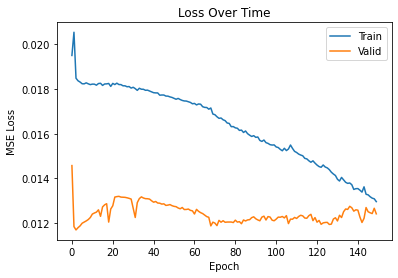

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [ ]:
lstm_pred = scaler.inverse_transform(model.predict(X_test)) # Do the prediction on the test set and inverse transform the scaled values to actual values
lstm_pred = pd.Series([i[0] for i in lstm_pred])

In [ ]:
y_truth_test = scaler.inverse_transform(y_test.reshape(y_test.shape[0], y_test.shape[1])) #reshape into 339x28
y_truth_test = pd.Series([i[0] for i in y_truth_test])

In [ ]:
# Use the model_score function defined to give the improvement metrics
rmse_lstm = sqrt(mean_squared_error(y_truth_test, lstm_pred))
model_score(lstm_pred, y_truth_test, rmse_benchmark)

RMSE: 4.915637428639617
RMSE(benchmark): 5.2613867960833405
Relative RMSE (): 0.9342855066840734
6.6% improvement in RMSE as compared to Moving Average Model (Benchmark)

MAE: 3.7353473286361467
Mean: 7.828908554572271
MAE to Mean Ratio: 0.47712236036460204


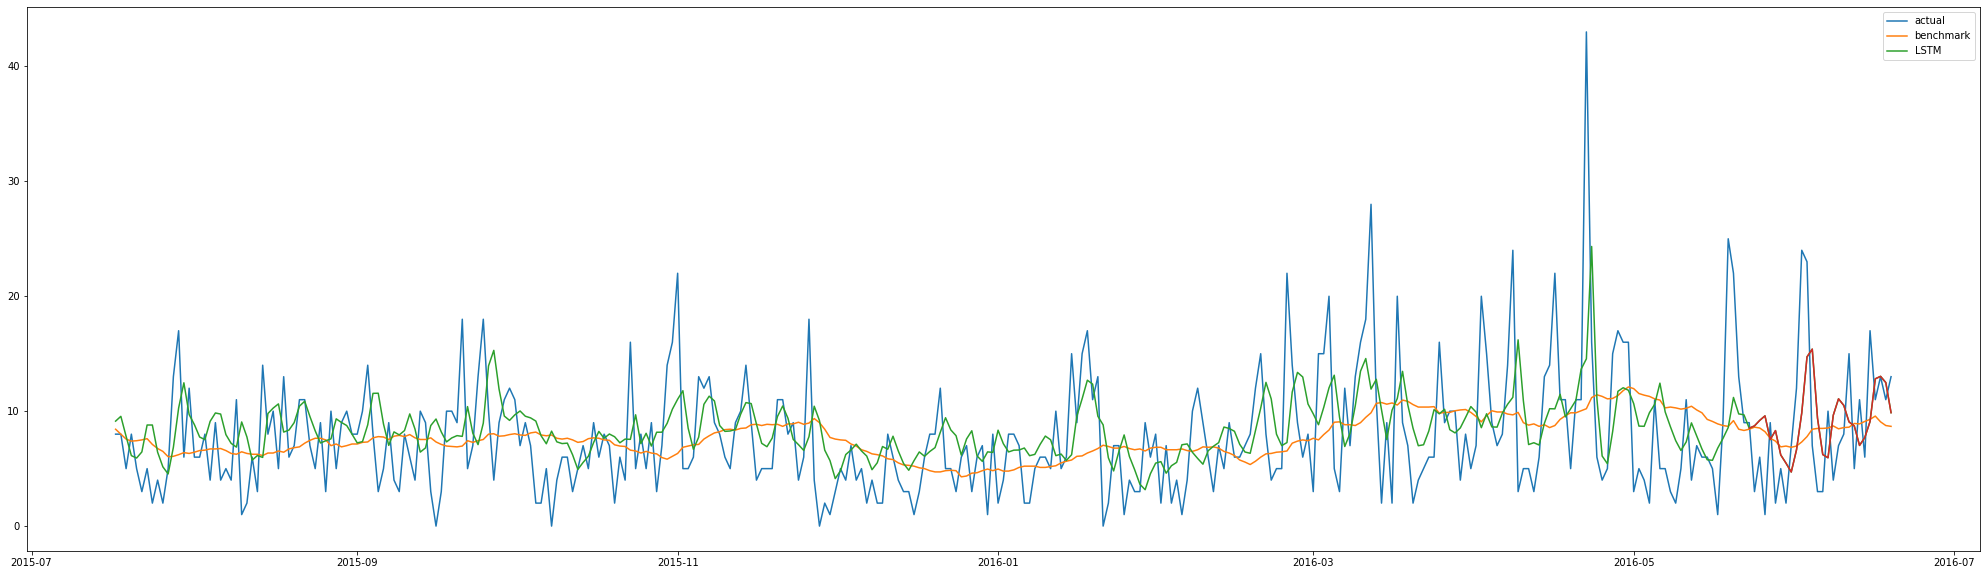

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(final['date'].tail(len(y_truth_test)),y_truth_test,label="actual")
plt.plot(final['date'].tail(len(y_truth_test)),mavg_pred,label="benchmark")
plt.plot(final['date'].tail(len(y_truth_test)),lstm_pred,label="LSTM")
plt.plot(final['date'].tail(28),lstm_pred[-28:])
plt.legend()
plt.show()

In [ ]:
# vanilla LSTM
# define input sequence
raw_seq = ts_train['unit_sold']
# choose a number of time steps
n_steps = 3 #[Ben] The steps should follow the prediction window u are putting in , in our case 28 days
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([2, 4, 10])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
model_score(yhat, )

TypeError: ignored

##### Bidirectional LSTM

In [ ]:
scaler = MinMaxScaler(feature_range= (0,1))
y_truth_scaled = scaler.fit_transform(y_truth.values.reshape(-1,1))
train, test = train_test_split(y_truth_scaled, test_size = 0.2)

X_train, y_train = moving_window(train, n_steps_in= 28, n_steps_out= 28)
X_test, y_test = moving_window(test, n_steps_in= 28, n_steps_out= 28)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1520, 28, 1)
(1520, 28, 1)
(339, 28, 1)
(339, 28, 1)


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(256, activation= 'relu'), input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(rate = 0.15))
model.add(Dense(28))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics='mean_absolute_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 512)               528384    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 28)                14364     
Total params: 542,748
Trainable params: 542,748
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name = 'bilstm_uni'
history_file = 'history_' + model_name + '.csv'
model_file = 'model_' + model_name + '.h5'

csv_logger = CSVLogger(history_file)
model.fit(X_train, y_train, epochs = 150, batch_size = 16, shuffle= False, validation_data=(X_test, y_test), verbose= 1, callbacks= [csv_logger])
model.save(model_file)

Epoch 1/150
95/95 [==============================] - 12s 113ms/step - loss: 0.0194 - mean_absolute_error: 0.1050 - val_loss: 0.0134 - val_mean_absolute_error: 0.0938
Epoch 2/150
95/95 [==============================] - 10s 108ms/step - loss: 0.0197 - mean_absolute_error: 0.1067 - val_loss: 0.0117 - val_mean_absolute_error: 0.0794
Epoch 3/150
95/95 [==============================] - 10s 109ms/step - loss: 0.0184 - mean_absolute_error: 0.1034 - val_loss: 0.0118 - val_mean_absolute_error: 0.0832
Epoch 4/150
95/95 [==============================] - 10s 109ms/step - loss: 0.0186 - mean_absolute_error: 0.1038 - val_loss: 0.0117 - val_mean_absolute_error: 0.0811
Epoch 5/150
95/95 [==============================] - 10s 109ms/step - loss: 0.0182 - mean_absolute_error: 0.1030 - val_loss: 0.0118 - val_mean_absolute_error: 0.0829
Epoch 6/150
95/95 [==============================] - 10s 108ms/step - loss: 0.0184 - mean_absolute_error: 0.1035 - val_loss: 0.0120 - val_mean_absolute_error: 0.0845
Epoc

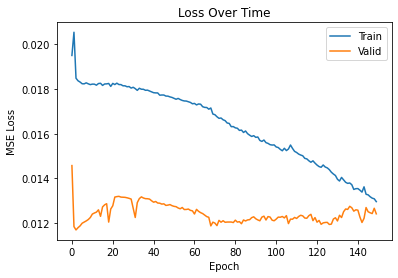

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [ ]:
blstm_pred = scaler.inverse_transform(model.predict(X_test))
blstm_pred = pd.Series([i[0] for i in blstm_pred])

In [ ]:
y_truth_test = scaler.inverse_transform(y_test.reshape(y_test.shape[0], y_test.shape[1]))
y_truth_test = pd.Series([i[0] for i in y_truth_test])

In [ ]:
rmse_blstm = sqrt(mean_squared_error(y_truth_test, blstm_pred))
model_score(blstm_pred, y_truth_test, rmse_benchmark)

RMSE: 5.255660176115584
RMSE(benchmark): 5.2613867960833405
Relative RMSE (): 0.9989115759419134
0.1% improvement in RMSE as compared to Moving Average Model (Benchmark)

MAE: 3.9119118525918606
Mean: 7.828908554572271
MAE to Mean Ratio: 0.49967525170634547


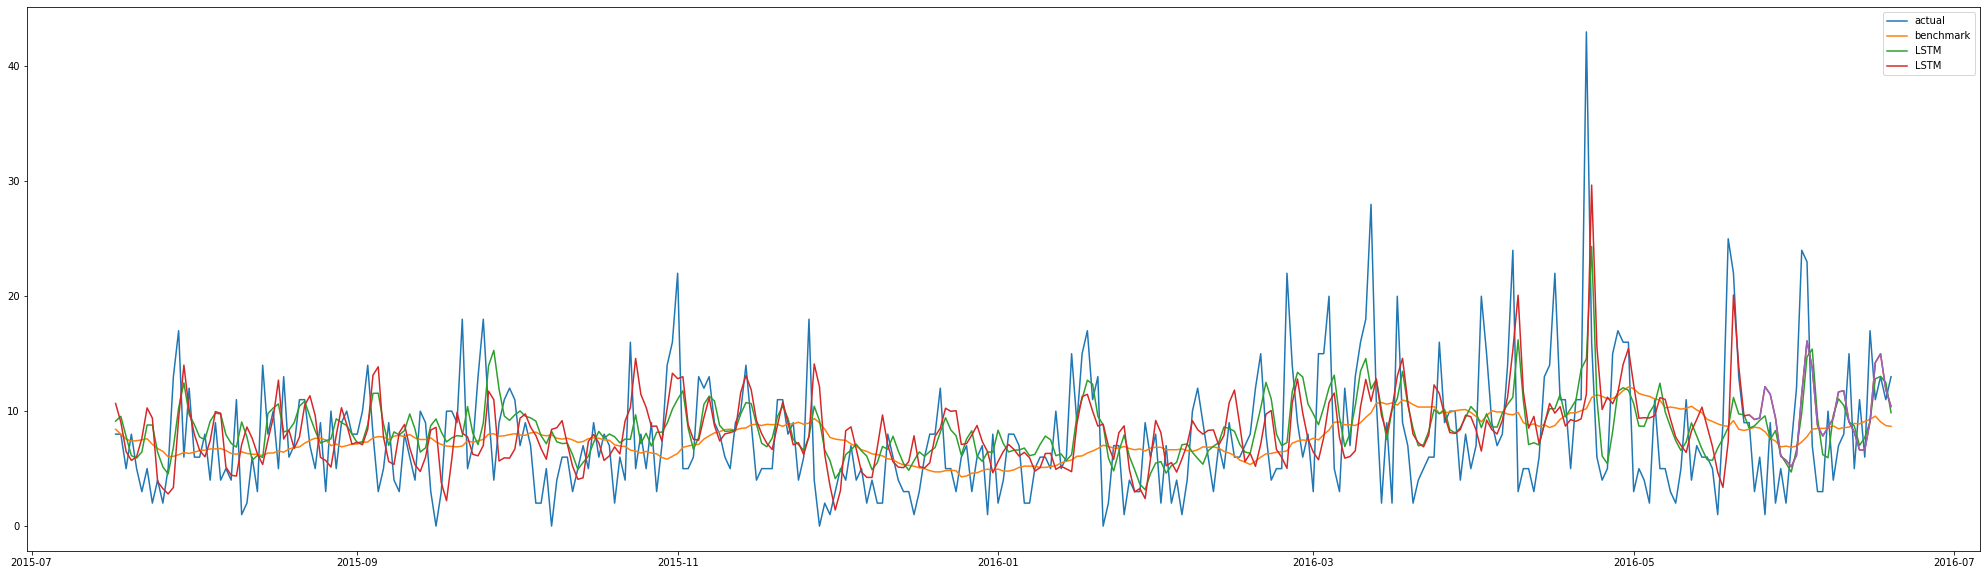

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(final['date'].tail(len(y_truth_test)),y_truth_test,label="actual")
plt.plot(final['date'].tail(len(y_truth_test)),mavg_pred,label="benchmark")
plt.plot(final['date'].tail(len(y_truth_test)),lstm_pred,label="LSTM")
plt.plot(final['date'].tail(len(y_truth_test)),blstm_pred,label="LSTM")
plt.plot(final['date'].tail(28),blstm_pred[-28:])
plt.legend()
plt.show()

In [ ]:
# biredictional LSTM
from keras.layers import Bidirectional

# define input sequence
raw_seq = ts_train['unit_sold']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([2, 4, 10])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

*italicised text*##### ARIMA --- skip ARIMA since I know the dataset is not suitable for traditional methods

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
from statsmodels.tsa.arima_model import ARIMA
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
# import warnings
# warnings.filterwarnings("ignore")
# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# evaluate_models(y_truth, p_values, d_values, q_values)


In [ ]:
# forecast confidence interval
# series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)

# y_truth = y_truth.astype('float32')
# size = len(y_truth) - 1
# train, test = y_truth[0:size], y_truth[size:]

# model = ARIMA(train, order=(5,1,1))
# model_fit = model.fit()

# #forecast
# forecast, stderr, conf = model_fit.forecast()
# print('Expected: %.3f' % test[0])
# print('Forecast: %.3f' % forecast)
# print('Standard Error: %.3f' % stderr)
# print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))